<a href="https://colab.research.google.com/github/Nicole-Wanjiru/CollaborativeFilteringMovieRecommenderSystem/blob/main/CollaborativeFilteringMovieRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Systems
## 1. Collaborative Filtering ->
A technique used in recommendation systems to predict the user's interest or preferences by collecting preferences from many users.

### Applications:
1. Ecommerce e,g Jumia-> Recommend products based on user's previous purchases.

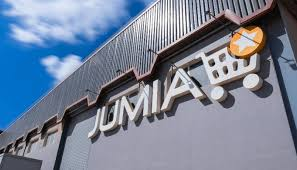


2. Streaming Services e,g Netflix, Spotify, YouTube -> Used to suggest movies.
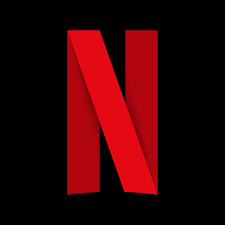
3. Social media platforms ie, X, Facebook, Tiktok, Instagram -> to suggest friends, discussions, groups etc based on the interactions of other users.
4. News Aggregators -> websites like google news to recommend articles and news based on users reading habits.

## 2. Content Based Recommendation->
This technique relies on the behaviors, characteristics and preferences of the actual users and users' own historical preferences.

It uses Natural Language Processing...

In [2]:
##Reading The Dataset
# Users Dataset
import pandas as pd
users = pd.read_csv('https://msi.martial.co.ke/data/file.csv')
users

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
# Movie IDs Dataset
movies = pd.read_csv('https://msi.martial.co.ke/data/Movie_Id_Titles.csv')
movies

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
# Merge The Users and Movies Dataset
df = pd.merge(users,movies, on='item_id')
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [5]:
# Explortory Data Analysis
# 1. Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [15]:
#2. Maximum and Minimum Rating and Average Rating:
df['rating']. max()
df['rating'].min()
df['rating'].mean()
df['title'].count()

100003

In [10]:
#3. Statistical Analysis
#Total users are: 943
#Total Movies:100,003
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [11]:
#4. Checking Empties:
df.isnull().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0
title,0


In [ ]:
# Recommendation is based on:
#1. Rating of the movies
#2. Number of users

In [14]:
#a)Group Movies (Categorical/Text Columns/Objects): Based on thE Average Ratings
#Determine the highest rated movies:
mean_ratings = df.groupby('title')['rating'].mean()
mean_ratings.sort_values(ascending=False)

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [18]:
#b) How Many Users Rated A Particular Movie Item
rating_count= df.groupby('title')['rating'].count()
rating_count.sort_values(ascending=False)

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [21]:
#Create a DataFrame that will contain the Title, Mean Ratings, and Number of Views
df_new = pd.DataFrame(mean_ratings)
df_new['number_of_views']= pd.DataFrame(rating_count)
df_new.sort_values(by='number_of_views', ascending = False)

,rating,number_of_views
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [23]:
#PIVOT TABLE:
#Data can be viewed in three dimensions 3D
# X-Axis = Columns
#Y-Axis = indexing
#Z-Axis = Values

In [26]:
pd.set_option('display.max_columns',100)
pivot = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
pivot

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),Alien (1979),Alien 3 (1992),Alien: Resurrection (1997),Aliens (1986),All About Eve (1950),All Dogs Go to Heaven 2 (1996),All Over Me (1997),All Things Fair (1996),Alphaville (1965),...,What's Love Got to Do with It (1993),When Harry Met Sally... (1989),When Night Is Falling (1995),When We Were Kings (1996),When a Man Loves a Woman (1994),When the Cats Away (Chacun cherche son chat) (1996),While You Were Sleeping (1995),"White Balloon, The (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [28]:
#Selecting a Movie from the title
selected_movie = pivot['Godfather, The (1972)']
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Correlation: Check relationship betweeen two variables/columns
similar = pivot.corrwith(selected_movie)
similar.sort_values(ascending = False)

,0
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Godfather, The (1972)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [32]:
similar_df = pd.DataFrame(similar, columns = ['correlation'])
similar_df.sort_values(by='correlation',ascending = False)

,correlation
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Godfather, The (1972)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [33]:
#Join the similar_df with the new_df['number_of_views']
similar_df = similar_df.join(df_new['number_of_views'])
similar_df

,correlation,number_of_views
title,,
'Til There Was You (1997),0.612372,9
1-900 (1994),-0.471405,5
101 Dalmatians (1996),0.084183,109
12 Angry Men (1957),0.034258,125
187 (1997),0.467335,41
...,...,...
Young Guns II (1990),0.129426,44
"Young Poisoner's Handbook, The (1995)",0.059479,41
Zeus and Roxanne (1997),-0.944911,6


In [36]:
# Recommendation:
#Positive correlation
#High Number of Viewers
condition = similar_df['number_of_views']>300
similar_df= similar_df[condition]
recommended_movies = similar_df.sort_values(by='correlation', ascending = False)
recommended_movies.head(10)

,correlation,number_of_views
title,,
"Godfather, The (1972)",1.000000,413
Chasing Amy (1997),0.259994,379
Pulp Fiction (1994),0.227765,394
Fargo (1996),0.203942,508
Monty Python and the Holy Grail (1974),0.197892,316
Men in Black (1997),0.195314,303
Star Wars (1977),0.189775,584
"Fugitive, The (1993)",0.162893,336
Forrest Gump (1994),0.157152,321
